In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.colors import to_hex
import matplotlib.pyplot as plt

We are going to use the BTM dataset provided by Professor Klepach. I have renamed the spreadsheet in the below for ease of use.

# Prep The Data <a class="anchor" id="prepData"></a>

## 1. Load and look at your data <a class="anchor" id="loadData"></a>

* Are there any ethical concerns with using this data for our purpose today?
  * Does the data set contain personally identifiable information?
  * Does the data set contain sensitive variables (eg variables for gender or ethnicity)?
  * Does the license of the data permit its use by us?

In [6]:
xls = pd.ExcelFile('dataExploration/BTM.xlsx')
df = pd.read_excel(xls, 'Combined')
# display(df.head())
# drop the first column
df = df.iloc[: , 1:]
display(df.head())

,Longitude,Latitude,Common Name,Condition Class / Infestation Pattern,List of Trees on residential property,BTM positive trees self reported on residential property,Number of BTM positive Tree Species on property,Dbh 1. inches,Dbh 2,Dbh 3,...,Dbh 5,Dbh 6,Number Observed BTM Nests,Distance to Water (feet),Entry Source,BTM (Y/N),Interest in Help,Tree Type (Ornamental | Fruiting / Flowering | Bush),Proposed Treatment Type (Insert/Injection; Manual Removal; Organic Spray),"Treatm. Priority (1: High, 2: Med, 3: Low)"
0,-69.633445,44.551271,Crabapple,Good,NaN,NaN,1.0,10.0,...,...,...,...,...,75,>250,Bartlett Invent Feb 2022,Y,NaN,Fruiting / Flowering,Organic Spray,1.0
1,-69.629734,44.549535,Crabapple,Fair,NaN,NaN,1.0,21.0,...,...,...,...,...,50,>250,Bartlett Invent Feb 2022,Y,NaN,Fruiting / Flowering,Organic Spray,1.0
2,-69.627131,44.551959,Elm-American,Good,NaN,NaN,1.0,4.0,...,...,...,...,...,50,<25,Bartlett Invent Feb 2022,Y,NaN,Ornamental,Insert/Injection,1.0
3,-69.629361,44.549576,Elm-American,Good,NaN,NaN,1.0,42.0,...,...,...,...,...,50,>250,Bartlett Invent Feb 2022,Y,NaN,Ornamental,Insert/Injection,1.0
4,-69.662301,44.528730,Oak-Northern Red,Good,NaN,NaN,1.0,24.0,...,...,...,...,...,50,>250,Bartlett Invent Feb 2022,Y,NaN,Ornamental,Insert/Injection,1.0


In [5]:
print("\nInspect the Data\n")
print("\ncolumns\n", df.columns)
print("\nshape\n", df.shape)
print("\ndtypes\n", df.dtypes)
print("\nmissing values\n", df.isnull().any())


Inspect the Data


columns
 Index(['Longitude', 'Latitude', 'Common Name',
       'Condition Class / Infestation Pattern',
       'List of Trees on  residential property',
       'BTM positive trees self reported  on residential property',
       'Number of BTM positive Tree Species on property', 'Dbh 1. inches',
       'Dbh 2', 'Dbh 3', 'Dbh 4', 'Dbh 5', 'Dbh 6',
       'Number Observed BTM Nests', 'Distance to Water (feet)', 'Entry Source',
       'BTM (Y/N)', 'Interest in Help',
       'Tree Type (Ornamental | Fruiting / Flowering | Bush)',
       'Proposed Treatment Type (Insert/Injection; Manual Removal; Organic Spray)',
       'Treatm.  Priority (1: High, 2: Med, 3: Low)'],
      dtype='object')

shape
 (932, 21)

dtypes
 Longitude                                                                    float64
Latitude                                                                     float64
Common Name                                                                   object
Condit

Referring to the cells below, which contains a report of the data, please answer:

* How many data points are there?
* How many variables are there?
  * How many qualitative (e.g. boolean, binary)?
  * How many quantitative continuous?
  * How many quantitative discrete?
* Is there a value for each variable for each data point? 
* Do the values make sense? Are there outliers or other insanities?
* Are the variables independent of each other? How do you make that assessment?

In [6]:
print("\n\nSummary Statistics\n")
print("\nquantitative variables\n")
display(df.describe(include='float'))
print("\nqualitative variables\n")
display(df.describe(include='object'))
print("\nvalues for important qualitative variables\n")
print(df['Common Name'].unique())
print(df['Condition Class / Infestation Pattern'].unique())
print(df['Distance to Water (feet)'].unique())
print(df['Tree Type (Ornamental | Fruiting / Flowering | Bush)'].unique())



Summary Statistics


quantitative variables



,Longitude,Latitude,Number of BTM positive Tree Species on property,Dbh 1. inches,"Treatm. Priority (1: High, 2: Med, 3: Low)"
count,932.000000,932.000000,903.000000,602.000000,376.000000
mean,-69.646845,44.550961,0.614618,10.888704,1.335106
std,0.013145,0.015656,0.865633,6.583843,0.555642
min,-69.714351,44.506117,0.000000,1.000000,1.000000
25%,-69.658124,44.537907,0.000000,6.000000,1.000000
50%,-69.646313,44.550819,0.000000,10.000000,1.000000
75%,-69.634915,44.561721,1.000000,15.000000,2.000000
max,-69.617809,44.583999,6.000000,46.000000,3.000000



qualitative variables



,Common Name,Condition Class / Infestation Pattern,List of Trees on residential property,BTM positive trees self reported on residential property,Dbh 2,Dbh 3,Dbh 4,Dbh 5,Dbh 6,Number Observed BTM Nests,Distance to Water (feet),Entry Source,BTM (Y/N),Interest in Help,Tree Type (Ornamental | Fruiting / Flowering | Bush),Proposed Treatment Type (Insert/Injection; Manual Removal; Organic Spray)
count,627,627,273,151,602,602,602,602,602,627,602,932,932,305,784,785
unique,34,6,102,55,19,13,11,7,5,29,4,3,2,4,4,6
top,Oak-Northern Red,Good,"Maple,","Oak,",...,...,...,...,...,0,>250,Bartlett Invent Feb 2022,Y,Y,Ornamental,Insert/Injection
freq,126,421,27,19,525,559,580,593,598,338,430,602,505,196,645,354



values for important qualitative variables

['Crabapple ' 'Elm-American ' 'Oak-Northern Red ' 'Cherry-Black '
 'Pear-Callery ' 'Serviceberry ' 'Birch-Paper ' 'Oak-White '
 'Maple-Sugar ' 'Poplar-Aspen ' 'Elm-Chinese ' 'Poplar-Bigtooth Aspen '
 'Maple-Boxelder ' "Maple-Freeman's " 'Maple-Norway ' 'Maple-Red '
 'Ash-Green ' 'Ash-White ' 'Birch-River ' 'Linden-Littleleaf '
 'Ash-Black ' 'Beech-American ' 'Ginkgo ' 'Honeylocust-Thornless Common '
 'Horsechestnut-Common ' 'Lilac-Japanese Tree ' 'Locust-Black '
 'Maple-Silver ' 'Pine-Eastern White ' 'Plum-Purple Leaf '
 'Spruce-Colorado Blue ' 'Willow ' nan 'Oak' 'Maple']
['Good ' 'Fair ' 'Poor ' 'Dead ' nan 'Continuous' 'Patchy']
['>250 ' '<25 ' '25-250 ' ' ' nan]
['Fruiting / Flowering' 'Ornamental' 'Bush' 'Fruiting/Flowering' nan]



Inspect Variable Correlations



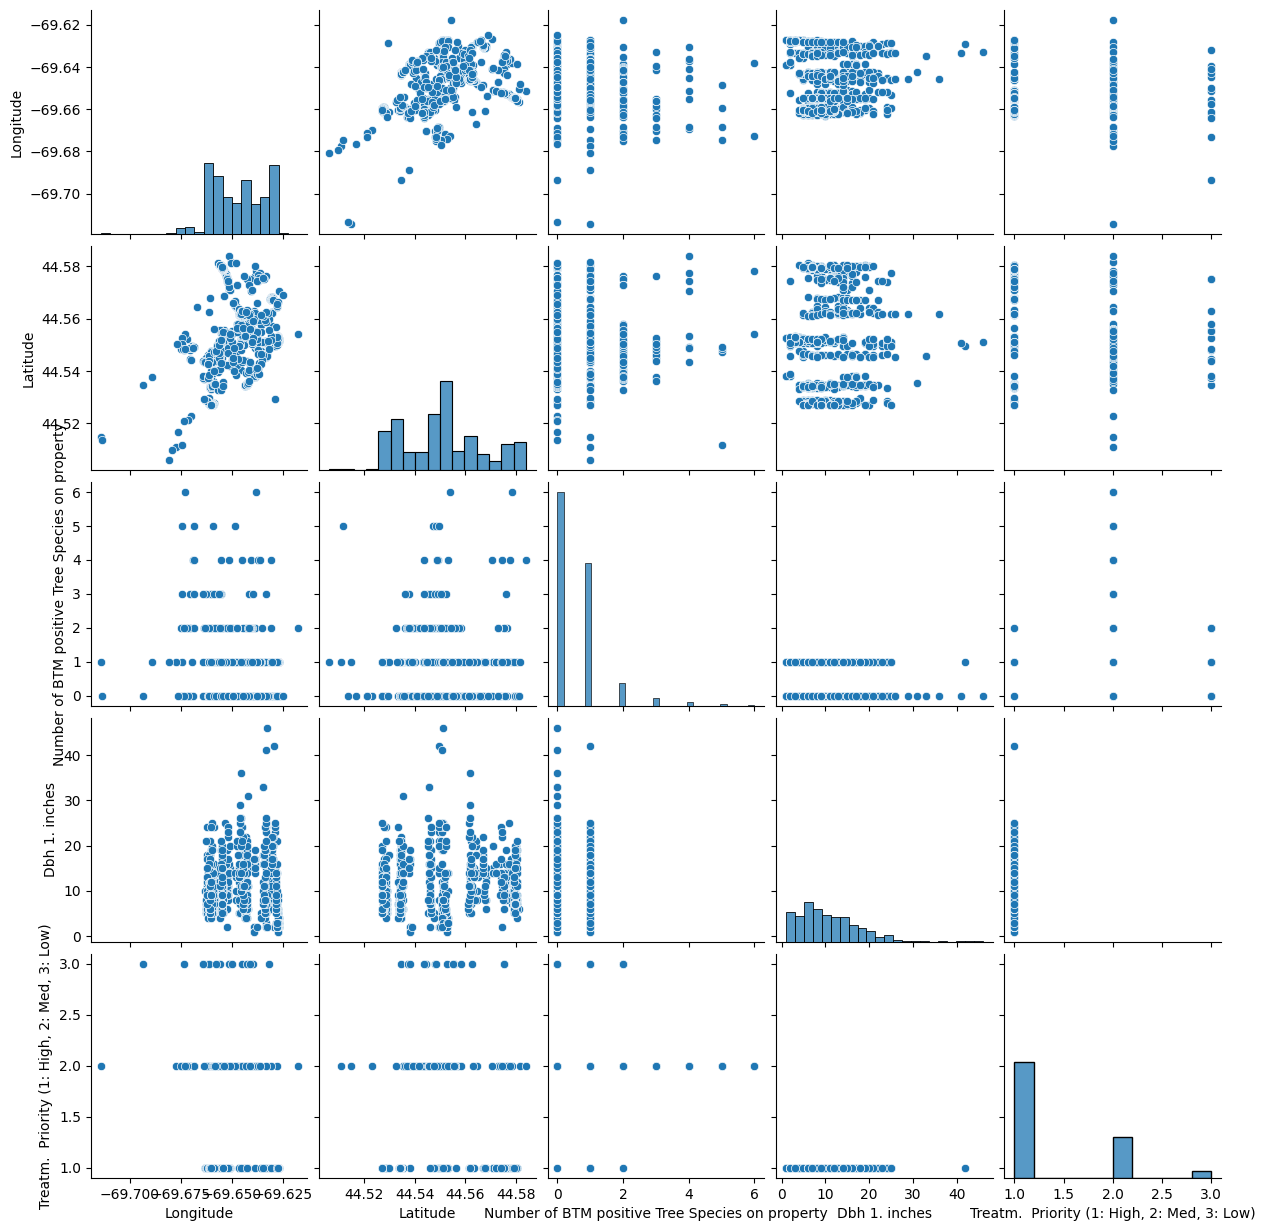

In [7]:
print("\nInspect Variable Correlations\n")
sns.pairplot(df, kind = "scatter")

## Map the data!

This will be something you haven't done before, but this is spatial data so it's a good time to pick it up!

In [8]:
fig = px.scatter_mapbox(df, lat='Latitude', lon='Longitude')
fig.update_layout(mapbox_style="open-street-map")
fig.update_geos(fitbounds="locations")
fig.show()

## 2. Consider Transforming/Normalizing the Data <a class="anchor" id="normalizeData"></a>

We can't do PCA on this dataset unless all the variables are converted into quantitative and missing values filled in. A baseline approach (you can do better!):
* Each value in every 'object' type column will be converted to the index of the value from a dictionary of the unique values in that column
* We call fillna to replace every (remaining) NaN with the median value
* We convert all of that to type float64

In [97]:
converted_df = pd.DataFrame(df)
for col in df.columns:
    if df[col].dtype == 'object':
        vals = {name: index for index, name in enumerate(df[col].unique())}
        converted_df[col] = df[col].apply(lambda x : vals[x])
    else:
        converted_df[col] = df[col]
display(converted_df.head())
display(df.head())

,Longitude,Latitude,Common Name,Condition Class / Infestation Pattern,List of Trees on residential property,BTM positive trees self reported on residential property,Number of BTM positive Tree Species on property,Dbh 1. inches,Dbh 2,Dbh 3,...,Dbh 5,Dbh 6,Number Observed BTM Nests,Distance to Water (feet),Entry Source,BTM (Y/N),Interest in Help,Tree Type (Ornamental | Fruiting / Flowering | Bush),Proposed Treatment Type (Insert/Injection; Manual Removal; Organic Spray),"Treatm. Priority (1: High, 2: Med, 3: Low)"
0,-69.633445,44.551271,0,0,0,0,1.0,10.0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,-69.629734,44.549535,0,1,0,0,1.0,21.0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
2,-69.627131,44.551959,1,0,0,0,1.0,4.0,0,0,...,0,0,1,1,0,0,0,1,1,1.0
3,-69.629361,44.549576,1,0,0,0,1.0,42.0,0,0,...,0,0,1,0,0,0,0,1,1,1.0
4,-69.662301,44.528730,2,0,0,0,1.0,24.0,0,0,...,0,0,1,0,0,0,0,1,1,1.0


,Longitude,Latitude,Common Name,Condition Class / Infestation Pattern,List of Trees on residential property,BTM positive trees self reported on residential property,Number of BTM positive Tree Species on property,Dbh 1. inches,Dbh 2,Dbh 3,...,Dbh 5,Dbh 6,Number Observed BTM Nests,Distance to Water (feet),Entry Source,BTM (Y/N),Interest in Help,Tree Type (Ornamental | Fruiting / Flowering | Bush),Proposed Treatment Type (Insert/Injection; Manual Removal; Organic Spray),"Treatm. Priority (1: High, 2: Med, 3: Low)"
0,-69.633445,44.551271,0,0,0,0,1.0,10.0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,-69.629734,44.549535,0,1,0,0,1.0,21.0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
2,-69.627131,44.551959,1,0,0,0,1.0,4.0,0,0,...,0,0,1,1,0,0,0,1,1,1.0
3,-69.629361,44.549576,1,0,0,0,1.0,42.0,0,0,...,0,0,1,0,0,0,0,1,1,1.0
4,-69.662301,44.528730,2,0,0,0,1.0,24.0,0,0,...,0,0,1,0,0,0,0,1,1,1.0


In [98]:
converted_df = converted_df.fillna(converted_df.median().round(1)).astype('float64')
display(converted_df.head())

,Longitude,Latitude,Common Name,Condition Class / Infestation Pattern,List of Trees on residential property,BTM positive trees self reported on residential property,Number of BTM positive Tree Species on property,Dbh 1. inches,Dbh 2,Dbh 3,...,Dbh 5,Dbh 6,Number Observed BTM Nests,Distance to Water (feet),Entry Source,BTM (Y/N),Interest in Help,Tree Type (Ornamental | Fruiting / Flowering | Bush),Proposed Treatment Type (Insert/Injection; Manual Removal; Organic Spray),"Treatm. Priority (1: High, 2: Med, 3: Low)"
0,-69.633445,44.551271,0.0,0.0,0.0,0.0,1.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-69.629734,44.549535,0.0,1.0,0.0,0.0,1.0,21.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-69.627131,44.551959,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,-69.629361,44.549576,1.0,0.0,0.0,0.0,1.0,42.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,-69.662301,44.528730,2.0,0.0,0.0,0.0,1.0,24.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


Let's zscore.

In [99]:
for col in ['Number of BTM positive Tree Species on property', 'Dbh 1. inches']:
    converted_df[col] = zscore(converted_df[col])

In [100]:
print("\nshape\n", converted_df.shape)
print("\ndtypes\n", converted_df.dtypes)
print("\nmissing values\n", converted_df.isnull().any())


shape
 (932, 21)

dtypes
 Longitude                                                                    float64
Latitude                                                                     float64
Common Name                                                                  float64
Condition Class / Infestation Pattern                                        float64
List of Trees on  residential property                                       float64
BTM positive trees self reported  on residential property                    float64
Number of BTM positive Tree Species on property                              float64
Dbh 1. inches                                                                float64
Dbh 2                                                                        float64
Dbh 3                                                                        float64
Dbh 4                                                                        float64
Dbh 5                                 

## 3. Consider Dimensionality Reduction <a class="anchor" id="pcaData"></a>

* In what circumstances do we want to use dimensionality reduction?
* We use PCA for dimensionality reduction. 

In [101]:
pca = PCA(n_components=5)
pca.fit(converted_df)
print(pca.explained_variance_ratio_)
pca_df = pca.transform(converted_df)
print(pca_df.shape, pca_df.dtype)
print(pca_df)

[0.718009   0.16746416 0.06200545 0.03174084 0.01089151]
(932, 5) float64
[[-21.14219886  15.73116401   2.24697469  16.30201305   9.14539163]
 [-21.01369614  15.46527313   2.19078914  15.71451011   8.60963053]
 [-20.60182184  14.81626567   1.95792436  15.26378303   8.88246844]
 ...
 [  3.73180123 -24.84577662  -2.1487255    2.2091087   -0.9696971 ]
 [  3.89049775 -25.24077955  -2.25876013   0.89805154  -2.38889021]
 [  3.7318027  -24.84577741  -2.14872058   2.20911317  -0.96970658]]


[Go back to the top](#review)

## 4. Clustering <a class="anchor" id="clustering"></a>

We can run kmeans clustering on converted_df or on pca_df.

In [102]:
km = KMeans(n_clusters=5)
km.fit(pca_df)
df['KMeans Labels'] = km.labels_
display(df.head())

,Longitude,Latitude,Common Name,Condition Class / Infestation Pattern,List of Trees on residential property,BTM positive trees self reported on residential property,Number of BTM positive Tree Species on property,Dbh 1. inches,Dbh 2,Dbh 3,...,Dbh 6,Number Observed BTM Nests,Distance to Water (feet),Entry Source,BTM (Y/N),Interest in Help,Tree Type (Ornamental | Fruiting / Flowering | Bush),Proposed Treatment Type (Insert/Injection; Manual Removal; Organic Spray),"Treatm. Priority (1: High, 2: Med, 3: Low)",KMeans Labels
0,-69.633445,44.551271,0,0,0,0,1.0,10.0,0,0,...,0,0,0,0,0,0,0,0,1.0,4
1,-69.629734,44.549535,0,1,0,0,1.0,21.0,0,0,...,0,1,0,0,0,0,0,0,1.0,4
2,-69.627131,44.551959,1,0,0,0,1.0,4.0,0,0,...,0,1,1,0,0,0,1,1,1.0,4
3,-69.629361,44.549576,1,0,0,0,1.0,42.0,0,0,...,0,1,0,0,0,0,1,1,1.0,4
4,-69.662301,44.528730,2,0,0,0,1.0,24.0,0,0,...,0,1,0,0,0,0,1,1,1.0,4


In [166]:
fig = px.scatter_mapbox(df, lat='Latitude', lon='Longitude', 
                        color=km.labels_.astype(str))
fig.update_layout(mapbox_style="open-street-map")
fig.update_geos(fitbounds="locations")
fig.show()

## 4. Support vector machine

Support vector machines are supervised learning models used for classification and regression. Recall that in an $\R^2$ plane, an SVM is to find an optimal line, polynomial, or circle to distinctly classify the data points. We want the distance between data points of both classes to the separating lines to be maximum. We will use SVM to predict whether a tree get infested by  BTMs given some information of a tree.

In [167]:
from sklearn import svm, model_selection, metrics

df_X contains features of a tree we are interested in and df_Y contains the data of whether a tree is infested or not.

In [168]:
df_X = converted_df[['Longitude', 'Latitude', 'Common Name', 'Dbh 1. inches', 'Dbh 2', 'Dbh 3', 'Dbh 4', 'Dbh 5', 'Dbh 6', 'Distance to Water (feet)', 'Tree Type (Ornamental | Fruiting / Flowering | Bush)']]
display(df_X.head())
df_y = converted_df[['BTM (Y/N)']]
display(df_y.head())

X = df_X.to_numpy()
y = df_y.to_numpy().reshape(df_y.shape[0],)
# print(X,y)

,Longitude,Latitude,Common Name,Dbh 1. inches,Dbh 2,Dbh 3,Dbh 4,Dbh 5,Dbh 6,Distance to Water (feet),Tree Type (Ornamental | Fruiting / Flowering | Bush)
0,-69.633445,44.551271,0.0,-0.108226,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-69.629734,44.549535,0.0,1.965662,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-69.627131,44.551959,1.0,-1.239437,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,-69.629361,44.549576,1.0,5.924902,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-69.662301,44.528730,2.0,2.531267,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,BTM (Y/N)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


Splite the data into test and train data. Size of test data : size of train data = 1:4

In [108]:
data_train_location, data_test_location, label_train, label_test = model_selection.train_test_split(X, y, test_size=0.2)
data_train = data_train_location[:,2:]
data_test = data_test_location[:,2:]

In [109]:
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=100000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(data_train, label_train) for clf in models)

In [110]:
from sklearn.metrics import confusion_matrix
predicted_tests = []
confusion_matrices = []
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

for clf, title in zip(models, titles):
    predicted_test = clf.predict(data_test)
    predicted_tests.append(predicted_test)
    ac_score = metrics.accuracy_score(label_test, predicted_test)
    m = confusion_matrix(label_test, predicted_test)
    confusion_matrices.append(m)
    print(title, ac_score)
    print(m)

SVC with linear kernel 0.8609625668449198
[[78 19]
 [ 7 83]]
LinearSVC (linear kernel) 0.8609625668449198
[[78 19]
 [ 7 83]]
SVC with RBF kernel 0.8770053475935828
[[80 17]
 [ 6 84]]
SVC with polynomial (degree 3) kernel 0.8556149732620321
[[82 15]
 [12 78]]


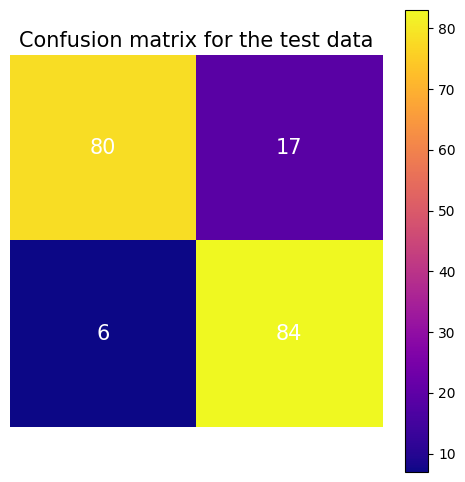

In [114]:
# print(confusion_matrices)
plt.figure(figsize=(6,6))
plt.imshow(confusion_matrices[0],cmap='plasma')
plt.axis('off')
plt.title('Confusion matrix for the test data', fontsize=15)
# thanks to "https://stackoverflow.com/questions/33828780/matplotlib-display-array-values-with-imshow"
plt.colorbar()
for (j,i),label in np.ndenumerate(confusion_matrices[2]):
    plt.text(i,j,label,ha='center',va='center', fontsize=15, color="white")
plt.show()

Plot the predicted label on the map.

In [171]:
fig = px.scatter_mapbox(lat=data_test_location[:,1], lon=data_test_location[:,0], color=predicted_tests[2].astype(str), zoom=11, mapbox_style='open-street-map')
fig.update_layout(mapbox_style="open-street-map")
fig.update_geos(fitbounds="locations")
fig.show()

Plot the different points between predicted data and test data.

In [172]:
ifsame = [label_test[i] == predicted_tests[2][i] for i in range(len(label_test))]
ifsame = np.array(ifsame).astype(int)
fig = px.scatter_mapbox(lat=data_test_location[:,1], lon=data_test_location[:,0], color=ifsame.astype(str), zoom=11, mapbox_style='open-street-map')
fig.update_layout(mapbox_style="open-street-map")
fig.update_geos(fitbounds="locations")
fig.show()

### 4. Random Forest
We will use random forest to predict whether a tree get infestation by  BTMs given some information of a tree.

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [156]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(data_train, label_train)

DecisionTreeClassifier()

In [157]:
forests = []
for x in range(1, 10):
    clf_forest = RandomForestClassifier(n_estimators=1)
    clf_forest.fit(data_train, label_train)
    forests.append(clf_forest)

In [158]:
label_pred_tree = clf_tree.predict(data_test)
label_pred_forests = []
for clf_forest in forests:
    label_pred_forests.append(clf_forest.predict(data_test))


In [164]:
print("Random Forest:")
print(metrics.accuracy_score(label_test, label_pred_tree))
print(metrics.confusion_matrix(label_test, label_pred_tree))

print("SVM with RBF kernel:")
print(metrics.accuracy_score(label_test, predicted_tests[2]))
print(confusion_matrix(label_test, predicted_tests[2]))


Random Forest:
0.8235294117647058
[[79 18]
 [15 75]]
SVM with RBF kernel
0.8770053475935828
[[80 17]
 [ 6 84]]
